In [1]:
import qutip
import numpy as np

In [2]:
H2_hamiltonian_string = """ZZ
0.011280
ZI
0.397936
IZ
0.397936
XX
0.180931"""

In [3]:
def parse_hamiltonian_string(hamiltonian_string):
    lines = hamiltonian_string.split()
    assert len(lines) % 2 == 0
    terms = []
    while len(lines) > 0:
        coefficient = float(lines.pop())
        pauli_string = lines.pop()
        terms.append(HamiltonianTerm(pauli_string, coefficient))
    return terms
    
class HamiltonianTerm(object):
    def __init__(self, pauli_string, coefficient):
        self.pauli_string = pauli_string
        self.coefficient = coefficient
    
    def __repr__(self) -> str:
        return '%s %s' % (self.coefficient, self.pauli_string)

    def __str__(self) -> str:
        return '%s %s' % (self.coefficient, self.pauli_string)
    
    def get_matrix(self):
        return self.coefficient * pauli_string_to_matrix(self.pauli_string)
    
def _to_matrix(pauli_char):
    if pauli_char == 'X':
        return qutip.sigmax()
    elif pauli_char == 'Y':
        return qutip.sigmay()
    elif pauli_char == 'Z':
        return qutip.sigmaz()
    return qutip.identity(2)
    
def pauli_string_to_matrix(pauli_string):
    matrices = []
    for char in pauli_string:
        matrices.append(_to_matrix(char))
    return qutip.tensor(matrices)
    

In [4]:
hamiltonian = qutip.Qobj()
for term in parse_hamiltonian_string(H2_hamiltonian_string):
    hamiltonian += term.get_matrix()

In [5]:
hamiltonian

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.807152  0.        0.        0.180931]
 [ 0.       -0.01128   0.180931  0.      ]
 [ 0.        0.180931 -0.01128   0.      ]
 [ 0.180931  0.        0.       -0.784592]]

In [54]:
rand_ket = qutip.tensor(qutip.rand_ket_haar(2), qutip.rand_ket_haar(2))

In [58]:
rand_ket

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[-0.03917048+0.14447644j]
 [-0.60015626-0.4059692j ]
 [ 0.12370476-0.05677852j]
 [ 0.0659824 +0.65552526j]]

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[-0.21102737+0.14461763j]
 [-0.65772556-0.62013766j]
 [-0.19855771+0.15014109j]
 [ 0.15422237-0.17784125j]]

In [101]:
energies = []
for _ in range(10):
    rand_ket = qutip.rand_ket_haar(4, dims=[[2, 2], [1, 1]])
    energy = 0.0
    for term in parse_hamiltonian_string(H2_hamiltonian_string):
        energy += qutip.expect(term.get_matrix(), rand_ket)
    energies.append(energy)
min(energies)

-0.2650946243524725

In [108]:
energies = []
min_energy = 0
for _ in range(1000000):
    rand_ket = qutip.rand_ket_haar(4, dims=[[2, 2], [1, 1]])
    energy = qutip.expect(hamiltonian, rand_ket)
    if energy < min_energy:
        print(energy)
        min_energy = energy

-0.22543181558716552
-0.32019093100700935
-0.49328826964513134
-0.60920475414684
-0.7573041673691369
-0.7668839368426019
-0.7729596680419163
-0.7747401457343255
-0.7785598625708484
-0.7899015775176655
-0.7945268361285881


KeyboardInterrupt: 

In [98]:
hamiltonian

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.807152  0.        0.        0.180931]
 [ 0.       -0.01128   0.180931  0.      ]
 [ 0.        0.180931 -0.01128   0.      ]
 [ 0.180931  0.        0.       -0.784592]]

In [33]:
qutip.rand_ket(1)

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[-0.29003086+0.9570173j]]

In [ ]:
qutip.identity(2)

In [ ]:
qutip.sigmaz() + qutip.sigmax()

In [8]:
matrices = [qutip.identity(2), qutip.sigmax(), qutip.sigmay(), qutip.sigmaz()]
terms = []
for m1 in matrices:
    for m2 in matrices:
        terms.append([m1, m2])

In [7]:
qutip.commutator(terms[3], terms[17]).norm()

IndexError: list index out of range

In [9]:
edges = {}
for i in range(len(terms)):
    edges[i] = {}
    for j in range(len(terms)):
        edges[i][j] = 0

for i in range(len(terms)):
    for j in range(len(terms)):
        if i > j:
            continue
        if qutip.commutator(qutip.tensor(terms[i][0], terms[i][1]), qutip.tensor(terms[j][0], terms[j][1])).norm() == 0:
            if qutip.commutator(terms[i][0], terms[j][0]).norm() == 0 and qutip.commutator(terms[i][1], terms[i][1]).norm() == 0:
                edges[i][j] = 2
                edges[j][i] = 2
            else:
                edges[i][j] = 1
                edges[i][j] = 1

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

In [72]:
matrices = ['I', 'X', 'Y', 'Z']
G=nx.Graph()
for m1 in matrices:
    for m2 in matrices:
        G.add_node(m1 + m2)
        
matrices = [('I', qutip.identity(2)), ('X', qutip.sigmax()), ('Y', qutip.sigmay()), ('Z', qutip.sigmaz())]

colors = []
for m1 in matrices:
    for m2 in matrices:
        src = m1[0] + m2[0]
        for m3 in matrices:
            for m4 in matrices:
                dst = m3[0] + m4[0]
                if src != dst:
                    if qutip.commutator(qutip.tensor(m1[1], m2[1]), qutip.tensor(m3[1], m4[1])).norm() == 0:
                        if qutip.commutator(m1[1], m3[1]).norm() == 0 and qutip.commutator(m2[1], m4[1]).norm() == 0:
                            G.add_edge(src, dst, color='r')
                            colors.append('r')
                        else:
                            G.add_edge(src, dst, color='b')
                            colors.append('b')

In [73]:
colors = [edge[2]['color'] for edge in G.edges(data=True)]

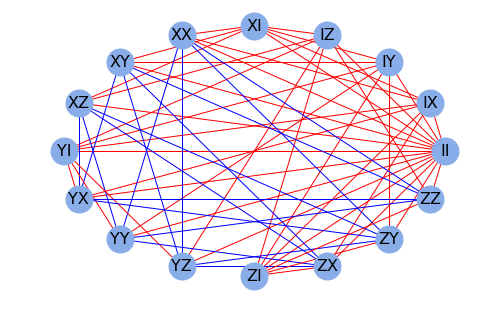

In [82]:
nx.draw(G, pos=nx.circular_layout(G), with_labels=True, font_family="Times", font_size=16, node_color='#88ade8', node_size=730, edge_color=colors)

In [39]:
list(nx.algorithms.clique.find_cliques(G))

[['II', 'XZ', 'YY', 'ZX'],
 ['II', 'XZ', 'ZY', 'YX'],
 ['II', 'XZ', 'IZ', 'XI'],
 ['II', 'XY', 'YZ', 'ZX'],
 ['II', 'XY', 'XI', 'IY'],
 ['II', 'XY', 'ZZ', 'YX'],
 ['II', 'YI', 'YZ', 'IZ'],
 ['II', 'YI', 'YY', 'IY'],
 ['II', 'YI', 'IX', 'YX'],
 ['II', 'YZ', 'XX', 'ZY'],
 ['II', 'XX', 'YY', 'ZZ'],
 ['II', 'XX', 'XI', 'IX'],
 ['II', 'ZZ', 'IZ', 'ZI'],
 ['II', 'IX', 'ZX', 'ZI'],
 ['II', 'IY', 'ZI', 'ZY']]

In [162]:
for i in range(len(terms)):
    print()
    for j in range(len(terms)):
        print(edges[i][j], end=", ")



1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,

1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 
1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 

1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 
1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 

1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 
1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 

1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 
1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 
1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 
1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 

1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 
1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 

1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 
1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 

1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 
1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 

1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 
1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 

1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 
1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 

1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 
1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 

1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 
1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 

1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 
1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 

1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 
1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 

1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 
1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 

In [167]:
for i in range(len(terms)):
    commuting_matrices = []
    for j in range(len(terms)):
        if edges[i][j] == 1:
            commuting_matrices.append(j)
    for j1 in commuting_matrices:
        for j2 in commuting_matrices:
            if edges[j1][j2] != 1:
                print(j1, j2)
                exit()

1 2
1 3
1 6
1 7
1 10
1 11
1 14
1 15
1 18
1 19
1 22
1 23
1 26
1 27
1 30
1 31
1 34
1 35
1 38
1 39
1 42
1 43
1 46
1 47
1 50
1 51
1 54
1 55
1 58
1 59
1 62
1 63
1 66
1 67
1 70
1 71
1 74
1 75
1 78
1 79
1 82
1 83
1 86
1 87
1 90
1 91
1 94
1 95
1 98
1 99
1 102
1 103
1 106
1 107
1 110
1 111
1 114
1 115
1 118
1 119
1 122
1 123
1 126
1 127
1 130
1 131
1 134
1 135
1 138
1 139
1 142
1 143
1 146
1 147
1 150
1 151
1 154
1 155
1 158
1 159
1 162
1 163
1 166
1 167
1 170
1 171
1 174
1 175
1 178
1 179
1 182
1 183
1 186
1 187
1 190
1 191
1 194
1 195
1 198
1 199
1 202
1 203
1 206
1 207
1 210
1 211
1 214
1 215
1 218
1 219
1 222
1 223
1 226
1 227
1 230
1 231
1 234
1 235
1 238
1 239
1 242
1 243
1 246
1 247
1 250
1 251
1 254
1 255
2 1
2 3
2 5
2 7
2 9
2 11
2 13
2 15
2 17
2 19
2 21
2 23
2 25
2 27
2 29
2 31
2 33
2 35
2 37
2 39
2 41
2 43
2 45
2 47
2 49
2 51
2 53
2 55
2 57
2 59
2 61
2 63
2 65
2 67
2 69
2 71
2 73
2 75
2 77
2 79
2 81
2 83
2 85
2 87
2 89
2 91
2 93
2 95
2 97
2 99
2 101
2 103
2 105
2 107
2 109
2 111
2 113

14 148
14 150
14 152
14 154
14 157
14 159
14 161
14 163
14 164
14 166
14 168
14 170
14 173
14 175
14 177
14 179
14 180
14 182
14 184
14 186
14 189
14 191
14 193
14 195
14 196
14 198
14 200
14 202
14 205
14 207
14 209
14 211
14 212
14 214
14 216
14 218
14 221
14 223
14 225
14 227
14 228
14 230
14 232
14 234
14 237
14 239
14 241
14 243
14 244
14 246
14 248
14 250
14 253
14 255
15 1
15 2
15 4
15 7
15 8
15 11
15 13
15 14
15 17
15 18
15 20
15 23
15 24
15 27
15 29
15 30
15 33
15 34
15 36
15 39
15 40
15 43
15 45
15 46
15 49
15 50
15 52
15 55
15 56
15 59
15 61
15 62
15 65
15 66
15 68
15 71
15 72
15 75
15 77
15 78
15 81
15 82
15 84
15 87
15 88
15 91
15 93
15 94
15 97
15 98
15 100
15 103
15 104
15 107
15 109
15 110
15 113
15 114
15 116
15 119
15 120
15 123
15 125
15 126
15 129
15 130
15 132
15 135
15 136
15 139
15 141
15 142
15 145
15 146
15 148
15 151
15 152
15 155
15 157
15 158
15 161
15 162
15 164
15 167
15 168
15 171
15 173
15 174
15 177
15 178
15 180
15 183
15 184
15 187
15 189
15 190
15 19

30 53
30 55
30 57
30 59
30 60
30 62
30 65
30 67
30 68
30 70
30 72
30 74
30 77
30 79
30 81
30 83
30 84
30 86
30 88
30 90
30 93
30 95
30 96
30 98
30 101
30 103
30 105
30 107
30 108
30 110
30 112
30 114
30 117
30 119
30 121
30 123
30 124
30 126
30 129
30 131
30 132
30 134
30 136
30 138
30 141
30 143
30 145
30 147
30 148
30 150
30 152
30 154
30 157
30 159
30 160
30 162
30 165
30 167
30 169
30 171
30 172
30 174
30 176
30 178
30 181
30 183
30 185
30 187
30 188
30 190
30 193
30 195
30 196
30 198
30 200
30 202
30 205
30 207
30 209
30 211
30 212
30 214
30 216
30 218
30 221
30 223
30 224
30 226
30 229
30 231
30 233
30 235
30 236
30 238
30 240
30 242
30 245
30 247
30 249
30 251
30 252
30 254
31 1
31 2
31 4
31 7
31 8
31 11
31 13
31 14
31 17
31 18
31 20
31 23
31 24
31 27
31 29
31 30
31 32
31 35
31 37
31 38
31 41
31 42
31 44
31 47
31 48
31 51
31 53
31 54
31 57
31 58
31 60
31 63
31 65
31 66
31 68
31 71
31 72
31 75
31 77
31 78
31 81
31 82
31 84
31 87
31 88
31 91
31 93
31 94
31 96
31 99
31 101
31 102
3

45 209
45 214
45 215
45 218
45 219
45 220
45 221
45 226
45 227
45 228
45 229
45 232
45 233
45 238
45 239
45 240
45 241
45 246
45 247
45 250
45 251
45 252
45 253
46 1
46 3
46 4
46 6
46 8
46 10
46 13
46 15
46 16
46 18
46 21
46 23
46 25
46 27
46 28
46 30
46 33
46 35
46 36
46 38
46 40
46 42
46 45
46 47
46 48
46 50
46 53
46 55
46 57
46 59
46 60
46 62
46 65
46 67
46 68
46 70
46 72
46 74
46 77
46 79
46 80
46 82
46 85
46 87
46 89
46 91
46 92
46 94
46 97
46 99
46 100
46 102
46 104
46 106
46 109
46 111
46 112
46 114
46 117
46 119
46 121
46 123
46 124
46 126
46 129
46 131
46 132
46 134
46 136
46 138
46 141
46 143
46 144
46 146
46 149
46 151
46 153
46 155
46 156
46 158
46 161
46 163
46 164
46 166
46 168
46 170
46 173
46 175
46 176
46 178
46 181
46 183
46 185
46 187
46 188
46 190
46 193
46 195
46 196
46 198
46 200
46 202
46 205
46 207
46 208
46 210
46 213
46 215
46 217
46 219
46 220
46 222
46 225
46 227
46 228
46 230
46 232
46 234
46 237
46 239
46 240
46 242
46 245
46 247
46 249
46 251
46 252
46 25

59 127
59 129
59 130
59 132
59 135
59 137
59 138
59 140
59 143
59 144
59 147
59 149
59 150
59 152
59 155
59 157
59 158
59 160
59 163
59 165
59 166
59 168
59 171
59 173
59 174
59 177
59 178
59 180
59 183
59 185
59 186
59 188
59 191
59 193
59 194
59 196
59 199
59 201
59 202
59 204
59 207
59 208
59 211
59 213
59 214
59 216
59 219
59 221
59 222
59 224
59 227
59 229
59 230
59 232
59 235
59 237
59 238
59 241
59 242
59 244
59 247
59 249
59 250
59 252
59 255
60 4
60 5
60 6
60 7
60 8
60 9
60 10
60 11
60 16
60 17
60 18
60 19
60 28
60 29
60 30
60 31
60 32
60 33
60 34
60 35
60 44
60 45
60 46
60 47
60 52
60 53
60 54
60 55
60 56
60 57
60 58
60 59
60 68
60 69
60 70
60 71
60 72
60 73
60 74
60 75
60 80
60 81
60 82
60 83
60 92
60 93
60 94
60 95
60 96
60 97
60 98
60 99
60 108
60 109
60 110
60 111
60 116
60 117
60 118
60 119
60 120
60 121
60 122
60 123
60 132
60 133
60 134
60 135
60 136
60 137
60 138
60 139
60 144
60 145
60 146
60 147
60 156
60 157
60 158
60 159
60 160
60 161
60 162
60 163
60 172
60 173
6

73 42
73 43
73 44
73 45
73 50
73 51
73 52
73 53
73 58
73 59
73 60
73 61
73 66
73 67
73 68
73 69
73 74
73 75
73 76
73 77
73 82
73 83
73 84
73 85
73 90
73 91
73 92
73 93
73 98
73 99
73 100
73 101
73 106
73 107
73 108
73 109
73 114
73 115
73 116
73 117
73 122
73 123
73 124
73 125
73 128
73 129
73 134
73 135
73 136
73 137
73 142
73 143
73 144
73 145
73 150
73 151
73 152
73 153
73 158
73 159
73 160
73 161
73 166
73 167
73 168
73 169
73 174
73 175
73 176
73 177
73 182
73 183
73 184
73 185
73 190
73 191
73 192
73 193
73 198
73 199
73 200
73 201
73 206
73 207
73 208
73 209
73 214
73 215
73 216
73 217
73 222
73 223
73 224
73 225
73 230
73 231
73 232
73 233
73 238
73 239
73 240
73 241
73 246
73 247
73 248
73 249
73 254
73 255
74 1
74 3
74 4
74 6
74 9
74 11
74 12
74 14
74 17
74 19
74 20
74 22
74 25
74 27
74 28
74 30
74 33
74 35
74 36
74 38
74 41
74 43
74 44
74 46
74 49
74 51
74 52
74 54
74 57
74 59
74 60
74 62
74 65
74 67
74 68
74 70
74 73
74 75
74 76
74 78
74 81
74 83
74 84
74 86
74 89
74 91
74 

84 232
84 233
84 234
84 235
84 236
84 237
84 238
84 239
84 248
84 249
84 250
84 251
84 252
84 253
84 254
84 255
85 2
85 3
85 6
85 7
85 8
85 9
85 12
85 13
85 18
85 19
85 22
85 23
85 24
85 25
85 28
85 29
85 32
85 33
85 36
85 37
85 42
85 43
85 46
85 47
85 48
85 49
85 52
85 53
85 58
85 59
85 62
85 63
85 66
85 67
85 70
85 71
85 72
85 73
85 76
85 77
85 82
85 83
85 86
85 87
85 88
85 89
85 92
85 93
85 96
85 97
85 100
85 101
85 106
85 107
85 110
85 111
85 112
85 113
85 116
85 117
85 122
85 123
85 126
85 127
85 128
85 129
85 132
85 133
85 138
85 139
85 142
85 143
85 144
85 145
85 148
85 149
85 154
85 155
85 158
85 159
85 162
85 163
85 166
85 167
85 168
85 169
85 172
85 173
85 178
85 179
85 182
85 183
85 184
85 185
85 188
85 189
85 192
85 193
85 196
85 197
85 202
85 203
85 206
85 207
85 208
85 209
85 212
85 213
85 218
85 219
85 222
85 223
85 226
85 227
85 230
85 231
85 232
85 233
85 236
85 237
85 242
85 243
85 246
85 247
85 248
85 249
85 252
85 253
86 1
86 3
86 5
86 7
86 8
86 10
86 12
86 14
86 17

98 138
98 140
98 142
98 145
98 147
98 149
98 151
98 153
98 155
98 157
98 159
98 160
98 162
98 164
98 166
98 168
98 170
98 172
98 174
98 177
98 179
98 181
98 183
98 185
98 187
98 189
98 191
98 192
98 194
98 196
98 198
98 200
98 202
98 204
98 206
98 209
98 211
98 213
98 215
98 217
98 219
98 221
98 223
98 224
98 226
98 228
98 230
98 232
98 234
98 236
98 238
98 241
98 243
98 245
98 247
98 249
98 251
98 253
98 255
99 1
99 2
99 5
99 6
99 9
99 10
99 13
99 14
99 16
99 19
99 20
99 23
99 24
99 27
99 28
99 31
99 33
99 34
99 37
99 38
99 41
99 42
99 45
99 46
99 48
99 51
99 52
99 55
99 56
99 59
99 60
99 63
99 65
99 66
99 69
99 70
99 73
99 74
99 77
99 78
99 80
99 83
99 84
99 87
99 88
99 91
99 92
99 95
99 97
99 98
99 101
99 102
99 105
99 106
99 109
99 110
99 112
99 115
99 116
99 119
99 120
99 123
99 124
99 127
99 128
99 131
99 132
99 135
99 136
99 139
99 140
99 143
99 145
99 146
99 149
99 150
99 153
99 154
99 157
99 158
99 160
99 163
99 164
99 167
99 168
99 171
99 172
99 175
99 177
99 178
99 181
99 18

114 42
114 44
114 46
114 49
114 51
114 53
114 55
114 57
114 59
114 61
114 63
114 65
114 67
114 69
114 71
114 73
114 75
114 77
114 79
114 80
114 82
114 84
114 86
114 88
114 90
114 92
114 94
114 96
114 98
114 100
114 102
114 104
114 106
114 108
114 110
114 113
114 115
114 117
114 119
114 121
114 123
114 125
114 127
114 128
114 130
114 132
114 134
114 136
114 138
114 140
114 142
114 145
114 147
114 149
114 151
114 153
114 155
114 157
114 159
114 161
114 163
114 165
114 167
114 169
114 171
114 173
114 175
114 176
114 178
114 180
114 182
114 184
114 186
114 188
114 190
114 192
114 194
114 196
114 198
114 200
114 202
114 204
114 206
114 209
114 211
114 213
114 215
114 217
114 219
114 221
114 223
114 225
114 227
114 229
114 231
114 233
114 235
114 237
114 239
114 240
114 242
114 244
114 246
114 248
114 250
114 252
114 254
115 1
115 2
115 5
115 6
115 9
115 10
115 13
115 14
115 16
115 19
115 20
115 23
115 24
115 27
115 28
115 31
115 32
115 35
115 36
115 39
115 40
115 43
115 44
115 47
115 49
115

127 212
127 215
127 216
127 219
127 221
127 222
127 225
127 226
127 228
127 231
127 232
127 235
127 237
127 238
127 240
127 243
127 245
127 246
127 249
127 250
127 252
127 255
128 64
128 65
128 66
128 67
128 68
128 69
128 70
128 71
128 72
128 73
128 74
128 75
128 76
128 77
128 78
128 79
128 80
128 81
128 82
128 83
128 84
128 85
128 86
128 87
128 88
128 89
128 90
128 91
128 92
128 93
128 94
128 95
128 96
128 97
128 98
128 99
128 100
128 101
128 102
128 103
128 104
128 105
128 106
128 107
128 108
128 109
128 110
128 111
128 112
128 113
128 114
128 115
128 116
128 117
128 118
128 119
128 120
128 121
128 122
128 123
128 124
128 125
128 126
128 127
128 192
128 193
128 194
128 195
128 196
128 197
128 198
128 199
128 200
128 201
128 202
128 203
128 204
128 205
128 206
128 207
128 208
128 209
128 210
128 211
128 212
128 213
128 214
128 215
128 216
128 217
128 218
128 219
128 220
128 221
128 222
128 223
128 224
128 225
128 226
128 227
128 228
128 229
128 230
128 231
128 232
128 233
128 234
128 

139 140
139 143
139 145
139 146
139 148
139 151
139 153
139 154
139 156
139 159
139 161
139 162
139 164
139 167
139 169
139 170
139 172
139 175
139 177
139 178
139 180
139 183
139 185
139 186
139 188
139 191
139 192
139 195
139 197
139 198
139 200
139 203
139 205
139 206
139 208
139 211
139 213
139 214
139 216
139 219
139 221
139 222
139 224
139 227
139 229
139 230
139 232
139 235
139 237
139 238
139 240
139 243
139 245
139 246
139 248
139 251
139 253
139 254
140 4
140 5
140 6
140 7
140 8
140 9
140 10
140 11
140 20
140 21
140 22
140 23
140 24
140 25
140 26
140 27
140 36
140 37
140 38
140 39
140 40
140 41
140 42
140 43
140 52
140 53
140 54
140 55
140 56
140 57
140 58
140 59
140 64
140 65
140 66
140 67
140 76
140 77
140 78
140 79
140 80
140 81
140 82
140 83
140 92
140 93
140 94
140 95
140 96
140 97
140 98
140 99
140 108
140 109
140 110
140 111
140 112
140 113
140 114
140 115
140 124
140 125
140 126
140 127
140 132
140 133
140 134
140 135
140 136
140 137
140 138
140 139
140 148
140 149
14

155 43
155 45
155 46
155 48
155 51
155 53
155 54
155 56
155 59
155 61
155 62
155 64
155 67
155 69
155 70
155 72
155 75
155 77
155 78
155 80
155 83
155 85
155 86
155 88
155 91
155 93
155 94
155 97
155 98
155 100
155 103
155 105
155 106
155 108
155 111
155 113
155 114
155 116
155 119
155 121
155 122
155 124
155 127
155 129
155 130
155 132
155 135
155 137
155 138
155 140
155 143
155 145
155 146
155 148
155 151
155 153
155 154
155 156
155 159
155 160
155 163
155 165
155 166
155 168
155 171
155 173
155 174
155 176
155 179
155 181
155 182
155 184
155 187
155 189
155 190
155 192
155 195
155 197
155 198
155 200
155 203
155 205
155 206
155 208
155 211
155 213
155 214
155 216
155 219
155 221
155 222
155 225
155 226
155 228
155 231
155 233
155 234
155 236
155 239
155 241
155 242
155 244
155 247
155 249
155 250
155 252
155 255
156 4
156 5
156 6
156 7
156 8
156 9
156 10
156 11
156 20
156 21
156 22
156 23
156 24
156 25
156 26
156 27
156 32
156 33
156 34
156 35
156 44
156 45
156 46
156 47
156 48
156 

170 202
170 205
170 207
170 209
170 211
170 212
170 214
170 217
170 219
170 220
170 222
170 224
170 226
170 229
170 231
170 232
170 234
170 237
170 239
170 241
170 243
170 244
170 246
170 249
170 251
170 252
170 254
171 1
171 2
171 4
171 7
171 9
171 10
171 12
171 15
171 16
171 19
171 21
171 22
171 24
171 27
171 29
171 30
171 33
171 34
171 36
171 39
171 41
171 42
171 44
171 47
171 48
171 51
171 53
171 54
171 56
171 59
171 61
171 62
171 64
171 67
171 69
171 70
171 72
171 75
171 77
171 78
171 81
171 82
171 84
171 87
171 89
171 90
171 92
171 95
171 96
171 99
171 101
171 102
171 104
171 107
171 109
171 110
171 113
171 114
171 116
171 119
171 121
171 122
171 124
171 127
171 129
171 130
171 132
171 135
171 137
171 138
171 140
171 143
171 144
171 147
171 149
171 150
171 152
171 155
171 157
171 158
171 161
171 162
171 164
171 167
171 169
171 170
171 172
171 175
171 176
171 179
171 181
171 182
171 184
171 187
171 189
171 190
171 192
171 195
171 197
171 198
171 200
171 203
171 205
171 206
171 209

180 143
180 144
180 145
180 146
180 147
180 148
180 149
180 150
180 151
180 160
180 161
180 162
180 163
180 164
180 165
180 166
180 167
180 184
180 185
180 186
180 187
180 188
180 189
180 190
180 191
180 192
180 193
180 194
180 195
180 196
180 197
180 198
180 199
180 216
180 217
180 218
180 219
180 220
180 221
180 222
180 223
180 232
180 233
180 234
180 235
180 236
180 237
180 238
180 239
180 240
180 241
180 242
180 243
180 244
180 245
180 246
180 247
181 2
181 3
181 6
181 7
181 8
181 9
181 12
181 13
181 16
181 17
181 20
181 21
181 26
181 27
181 30
181 31
181 32
181 33
181 36
181 37
181 42
181 43
181 46
181 47
181 50
181 51
181 54
181 55
181 56
181 57
181 60
181 61
181 64
181 65
181 68
181 69
181 74
181 75
181 78
181 79
181 82
181 83
181 86
181 87
181 88
181 89
181 92
181 93
181 98
181 99
181 102
181 103
181 104
181 105
181 108
181 109
181 112
181 113
181 116
181 117
181 122
181 123
181 126
181 127
181 130
181 131
181 134
181 135
181 136
181 137
181 140
181 141
181 144
181 145
181 148


196 46
196 47
196 56
196 57
196 58
196 59
196 60
196 61
196 62
196 63
196 64
196 65
196 66
196 67
196 68
196 69
196 70
196 71
196 80
196 81
196 82
196 83
196 84
196 85
196 86
196 87
196 96
196 97
196 98
196 99
196 100
196 101
196 102
196 103
196 112
196 113
196 114
196 115
196 116
196 117
196 118
196 119
196 128
196 129
196 130
196 131
196 132
196 133
196 134
196 135
196 144
196 145
196 146
196 147
196 148
196 149
196 150
196 151
196 160
196 161
196 162
196 163
196 164
196 165
196 166
196 167
196 176
196 177
196 178
196 179
196 180
196 181
196 182
196 183
196 200
196 201
196 202
196 203
196 204
196 205
196 206
196 207
196 216
196 217
196 218
196 219
196 220
196 221
196 222
196 223
196 232
196 233
196 234
196 235
196 236
196 237
196 238
196 239
196 248
196 249
196 250
196 251
196 252
196 253
196 254
196 255
197 2
197 3
197 6
197 7
197 8
197 9
197 12
197 13
197 18
197 19
197 22
197 23
197 24
197 25
197 28
197 29
197 34
197 35
197 38
197 39
197 40
197 41
197 44
197 45
197 50
197 51
197 54

205 242
205 243
205 244
205 245
205 248
205 249
205 254
205 255
206 1
206 3
206 4
206 6
206 8
206 10
206 13
206 15
206 17
206 19
206 20
206 22
206 24
206 26
206 29
206 31
206 33
206 35
206 36
206 38
206 40
206 42
206 45
206 47
206 49
206 51
206 52
206 54
206 56
206 58
206 61
206 63
206 64
206 66
206 69
206 71
206 73
206 75
206 76
206 78
206 80
206 82
206 85
206 87
206 89
206 91
206 92
206 94
206 96
206 98
206 101
206 103
206 105
206 107
206 108
206 110
206 112
206 114
206 117
206 119
206 121
206 123
206 124
206 126
206 128
206 130
206 133
206 135
206 137
206 139
206 140
206 142
206 144
206 146
206 149
206 151
206 153
206 155
206 156
206 158
206 160
206 162
206 165
206 167
206 169
206 171
206 172
206 174
206 176
206 178
206 181
206 183
206 185
206 187
206 188
206 190
206 193
206 195
206 196
206 198
206 200
206 202
206 205
206 207
206 209
206 211
206 212
206 214
206 216
206 218
206 221
206 223
206 225
206 227
206 228
206 230
206 232
206 234
206 237
206 239
206 241
206 243
206 244
206 246

214 190
214 193
214 195
214 197
214 199
214 200
214 202
214 204
214 206
214 209
214 211
214 213
214 215
214 216
214 218
214 220
214 222
214 224
214 226
214 228
214 230
214 233
214 235
214 237
214 239
214 240
214 242
214 244
214 246
214 249
214 251
214 253
214 255
215 1
215 2
215 5
215 6
215 8
215 11
215 12
215 15
215 17
215 18
215 21
215 22
215 24
215 27
215 28
215 31
215 32
215 35
215 36
215 39
215 41
215 42
215 45
215 46
215 48
215 51
215 52
215 55
215 57
215 58
215 61
215 62
215 64
215 67
215 68
215 71
215 73
215 74
215 77
215 78
215 80
215 83
215 84
215 87
215 89
215 90
215 93
215 94
215 97
215 98
215 101
215 102
215 104
215 107
215 108
215 111
215 113
215 114
215 117
215 118
215 120
215 123
215 124
215 127
215 128
215 131
215 132
215 135
215 137
215 138
215 141
215 142
215 144
215 147
215 148
215 151
215 153
215 154
215 157
215 158
215 161
215 162
215 165
215 166
215 168
215 171
215 172
215 175
215 177
215 178
215 181
215 182
215 184
215 187
215 188
215 191
215 193
215 194
215 197

223 131
223 133
223 134
223 137
223 138
223 140
223 143
223 144
223 147
223 149
223 150
223 153
223 154
223 156
223 159
223 161
223 162
223 164
223 167
223 168
223 171
223 173
223 174
223 177
223 178
223 180
223 183
223 184
223 187
223 189
223 190
223 193
223 194
223 196
223 199
223 200
223 203
223 205
223 206
223 209
223 210
223 212
223 215
223 216
223 219
223 221
223 222
223 224
223 227
223 229
223 230
223 233
223 234
223 236
223 239
223 240
223 243
223 245
223 246
223 249
223 250
223 252
223 255
224 16
224 17
224 18
224 19
224 20
224 21
224 22
224 23
224 24
224 25
224 26
224 27
224 28
224 29
224 30
224 31
224 48
224 49
224 50
224 51
224 52
224 53
224 54
224 55
224 56
224 57
224 58
224 59
224 60
224 61
224 62
224 63
224 64
224 65
224 66
224 67
224 68
224 69
224 70
224 71
224 72
224 73
224 74
224 75
224 76
224 77
224 78
224 79
224 96
224 97
224 98
224 99
224 100
224 101
224 102
224 103
224 104
224 105
224 106
224 107
224 108
224 109
224 110
224 111
224 128
224 129
224 130
224 131
224 

241 21
241 24
241 25
241 28
241 29
241 32
241 33
241 36
241 37
241 40
241 41
241 44
241 45
241 50
241 51
241 54
241 55
241 58
241 59
241 62
241 63
241 64
241 65
241 68
241 69
241 72
241 73
241 76
241 77
241 82
241 83
241 86
241 87
241 90
241 91
241 94
241 95
241 98
241 99
241 102
241 103
241 106
241 107
241 110
241 111
241 112
241 113
241 116
241 117
241 120
241 121
241 124
241 125
241 128
241 129
241 132
241 133
241 136
241 137
241 140
241 141
241 146
241 147
241 150
241 151
241 154
241 155
241 158
241 159
241 162
241 163
241 166
241 167
241 170
241 171
241 174
241 175
241 176
241 177
241 180
241 181
241 184
241 185
241 188
241 189
241 194
241 195
241 198
241 199
241 202
241 203
241 206
241 207
241 208
241 209
241 212
241 213
241 216
241 217
241 220
241 221
241 224
241 225
241 228
241 229
241 232
241 233
241 236
241 237
241 242
241 243
241 246
241 247
241 250
241 251
241 254
241 255
242 1
242 3
242 5
242 7
242 9
242 11
242 13
242 15
242 16
242 18
242 20
242 22
242 24
242 26
242 28
242

250 218
250 221
250 223
250 224
250 226
250 229
250 231
250 232
250 234
250 237
250 239
250 241
250 243
250 244
250 246
250 249
250 251
250 252
250 254
251 1
251 2
251 4
251 7
251 9
251 10
251 12
251 15
251 16
251 19
251 21
251 22
251 24
251 27
251 29
251 30
251 32
251 35
251 37
251 38
251 40
251 43
251 45
251 46
251 49
251 50
251 52
251 55
251 57
251 58
251 60
251 63
251 64
251 67
251 69
251 70
251 72
251 75
251 77
251 78
251 81
251 82
251 84
251 87
251 89
251 90
251 92
251 95
251 97
251 98
251 100
251 103
251 105
251 106
251 108
251 111
251 112
251 115
251 117
251 118
251 120
251 123
251 125
251 126
251 128
251 131
251 133
251 134
251 136
251 139
251 141
251 142
251 145
251 146
251 148
251 151
251 153
251 154
251 156
251 159
251 161
251 162
251 164
251 167
251 169
251 170
251 172
251 175
251 176
251 179
251 181
251 182
251 184
251 187
251 189
251 190
251 193
251 194
251 196
251 199
251 201
251 202
251 204
251 207
251 208
251 211
251 213
251 214
251 216
251 219
251 221
251 222
251 224

21 52
21 53
21 72
21 73
21 76
21 77
21 88
21 89
21 92
21 93
21 96
21 97
21 100
21 101
21 112
21 113
21 116
21 117
21 136
21 137
21 140
21 141
21 152
21 153
21 156
21 157
21 160
21 161
21 164
21 165
21 176
21 177
21 180
21 181
21 200
21 201
21 204
21 205
21 216
21 217
21 220
21 221
21 224
21 225
21 228
21 229
21 240
21 241
21 244
21 245
24 4
24 5
24 12
24 13
24 20
24 21
24 28
24 29
24 32
24 33
24 40
24 41
24 48
24 49
24 56
24 57
24 68
24 69
24 76
24 77
24 84
24 85
24 92
24 93
24 96
24 97
24 104
24 105
24 112
24 113
24 120
24 121
24 132
24 133
24 140
24 141
24 148
24 149
24 156
24 157
24 160
24 161
24 168
24 169
24 176
24 177
24 184
24 185
24 196
24 197
24 204
24 205
24 212
24 213
24 220
24 221
24 224
24 225
24 232
24 233
24 240
24 241
24 248
24 249
25 4
25 5
25 12
25 13
25 20
25 21
25 28
25 29
25 32
25 33
25 40
25 41
25 48
25 49
25 56
25 57
25 68
25 69
25 76
25 77
25 84
25 85
25 92
25 93
25 96
25 97
25 104
25 105
25 112
25 113
25 120
25 121
25 132
25 133
25 140
25 141
25 148
25 149
25 1

60 196
60 197
60 200
60 201
60 208
60 209
60 220
60 221
60 224
60 225
60 236
60 237
60 244
60 245
60 248
60 249
61 4
61 5
61 8
61 9
61 16
61 17
61 28
61 29
61 32
61 33
61 44
61 45
61 52
61 53
61 56
61 57
61 68
61 69
61 72
61 73
61 80
61 81
61 92
61 93
61 96
61 97
61 108
61 109
61 116
61 117
61 120
61 121
61 132
61 133
61 136
61 137
61 144
61 145
61 156
61 157
61 160
61 161
61 172
61 173
61 180
61 181
61 184
61 185
61 196
61 197
61 200
61 201
61 208
61 209
61 220
61 221
61 224
61 225
61 236
61 237
61 244
61 245
61 248
61 249
64 128
64 129
64 132
64 133
64 136
64 137
64 140
64 141
64 144
64 145
64 148
64 149
64 152
64 153
64 156
64 157
64 160
64 161
64 164
64 165
64 168
64 169
64 172
64 173
64 176
64 177
64 180
64 181
64 184
64 185
64 188
64 189
64 192
64 193
64 196
64 197
64 200
64 201
64 204
64 205
64 208
64 209
64 212
64 213
64 216
64 217
64 220
64 221
64 224
64 225
64 228
64 229
64 232
64 233
64 236
64 237
64 240
64 241
64 244
64 245
64 248
64 249
64 252
64 253
65 128
65 129
65 132
6

129 244
129 245
129 248
129 249
129 252
129 253
132 8
132 9
132 12
132 13
132 24
132 25
132 28
132 29
132 40
132 41
132 44
132 45
132 56
132 57
132 60
132 61
132 64
132 65
132 68
132 69
132 80
132 81
132 84
132 85
132 96
132 97
132 100
132 101
132 112
132 113
132 116
132 117
132 136
132 137
132 140
132 141
132 152
132 153
132 156
132 157
132 168
132 169
132 172
132 173
132 184
132 185
132 188
132 189
132 192
132 193
132 196
132 197
132 208
132 209
132 212
132 213
132 224
132 225
132 228
132 229
132 240
132 241
132 244
132 245
133 8
133 9
133 12
133 13
133 24
133 25
133 28
133 29
133 40
133 41
133 44
133 45
133 56
133 57
133 60
133 61
133 64
133 65
133 68
133 69
133 80
133 81
133 84
133 85
133 96
133 97
133 100
133 101
133 112
133 113
133 116
133 117
133 136
133 137
133 140
133 141
133 152
133 153
133 156
133 157
133 168
133 169
133 172
133 173
133 184
133 185
133 188
133 189
133 192
133 193
133 196
133 197
133 208
133 209
133 212
133 213
133 224
133 225
133 228
133 229
133 240
133 241


169 105
169 116
169 117
169 124
169 125
169 132
169 133
169 140
169 141
169 144
169 145
169 152
169 153
169 164
169 165
169 172
169 173
169 176
169 177
169 184
169 185
169 192
169 193
169 200
169 201
169 212
169 213
169 220
169 221
169 224
169 225
169 232
169 233
169 244
169 245
169 252
169 253
172 4
172 5
172 8
172 9
172 16
172 17
172 28
172 29
172 36
172 37
172 40
172 41
172 48
172 49
172 60
172 61
172 64
172 65
172 76
172 77
172 84
172 85
172 88
172 89
172 96
172 97
172 108
172 109
172 116
172 117
172 120
172 121
172 132
172 133
172 136
172 137
172 144
172 145
172 156
172 157
172 164
172 165
172 168
172 169
172 176
172 177
172 188
172 189
172 192
172 193
172 204
172 205
172 212
172 213
172 216
172 217
172 224
172 225
172 236
172 237
172 244
172 245
172 248
172 249
173 4
173 5
173 8
173 9
173 16
173 17
173 28
173 29
173 36
173 37
173 40
173 41
173 48
173 49
173 60
173 61
173 64
173 65
173 76
173 77
173 84
173 85
173 88
173 89
173 96
173 97
173 108
173 109
173 116
173 117
173 120
173 

208 249
208 252
208 253
209 32
209 33
209 36
209 37
209 40
209 41
209 44
209 45
209 48
209 49
209 52
209 53
209 56
209 57
209 60
209 61
209 64
209 65
209 68
209 69
209 72
209 73
209 76
209 77
209 80
209 81
209 84
209 85
209 88
209 89
209 92
209 93
209 128
209 129
209 132
209 133
209 136
209 137
209 140
209 141
209 144
209 145
209 148
209 149
209 152
209 153
209 156
209 157
209 224
209 225
209 228
209 229
209 232
209 233
209 236
209 237
209 240
209 241
209 244
209 245
209 248
209 249
209 252
209 253
212 8
212 9
212 12
212 13
212 24
212 25
212 28
212 29
212 32
212 33
212 36
212 37
212 48
212 49
212 52
212 53
212 64
212 65
212 68
212 69
212 80
212 81
212 84
212 85
212 104
212 105
212 108
212 109
212 120
212 121
212 124
212 125
212 128
212 129
212 132
212 133
212 144
212 145
212 148
212 149
212 168
212 169
212 172
212 173
212 184
212 185
212 188
212 189
212 200
212 201
212 204
212 205
212 216
212 217
212 220
212 221
212 224
212 225
212 228
212 229
212 240
212 241
212 244
212 245
213 8
213 

248 121
248 128
248 129
248 136
248 137
248 148
248 149
248 156
248 157
248 164
248 165
248 172
248 173
248 176
248 177
248 184
248 185
248 196
248 197
248 204
248 205
248 208
248 209
248 216
248 217
248 224
248 225
248 232
248 233
248 244
248 245
248 252
248 253
249 4
249 5
249 12
249 13
249 16
249 17
249 24
249 25
249 32
249 33
249 40
249 41
249 52
249 53
249 60
249 61
249 64
249 65
249 72
249 73
249 84
249 85
249 92
249 93
249 100
249 101
249 108
249 109
249 112
249 113
249 120
249 121
249 128
249 129
249 136
249 137
249 148
249 149
249 156
249 157
249 164
249 165
249 172
249 173
249 176
249 177
249 184
249 185
249 196
249 197
249 204
249 205
249 208
249 209
249 216
249 217
249 224
249 225
249 232
249 233
249 244
249 245
249 252
249 253
252 4
252 5
252 8
252 9
252 16
252 17
252 28
252 29
252 32
252 33
252 44
252 45
252 52
252 53
252 56
252 57
252 64
252 65
252 76
252 77
252 84
252 85
252 88
252 89
252 100
252 101
252 104
252 105
252 112
252 113
252 124
252 125
252 128
252 129
252 14

36 10
36 12
36 14
36 16
36 18
36 20
36 22
36 40
36 42
36 44
36 46
36 48
36 50
36 52
36 54
36 72
36 74
36 76
36 78
36 80
36 82
36 84
36 86
36 104
36 106
36 108
36 110
36 112
36 114
36 116
36 118
36 136
36 138
36 140
36 142
36 144
36 146
36 148
36 150
36 168
36 170
36 172
36 174
36 176
36 178
36 180
36 182
36 200
36 202
36 204
36 206
36 208
36 210
36 212
36 214
36 232
36 234
36 236
36 238
36 240
36 242
36 244
36 246
38 8
38 10
38 12
38 14
38 16
38 18
38 20
38 22
38 40
38 42
38 44
38 46
38 48
38 50
38 52
38 54
38 72
38 74
38 76
38 78
38 80
38 82
38 84
38 86
38 104
38 106
38 108
38 110
38 112
38 114
38 116
38 118
38 136
38 138
38 140
38 142
38 144
38 146
38 148
38 150
38 168
38 170
38 172
38 174
38 176
38 178
38 180
38 182
38 200
38 202
38 204
38 206
38 208
38 210
38 212
38 214
38 232
38 234
38 236
38 238
38 240
38 242
38 244
38 246
40 4
40 6
40 12
40 14
40 16
40 18
40 24
40 26
40 36
40 38
40 44
40 46
40 48
40 50
40 56
40 58
40 68
40 70
40 76
40 78
40 80
40 82
40 88
40 90
40 100
40 102
40 

74 136
74 138
74 144
74 146
74 152
74 154
74 160
74 162
74 168
74 170
74 176
74 178
74 184
74 186
74 192
74 194
74 200
74 202
74 208
74 210
74 216
74 218
74 224
74 226
74 232
74 234
74 240
74 242
74 248
74 250
76 4
76 6
76 8
76 10
76 20
76 22
76 24
76 26
76 36
76 38
76 40
76 42
76 52
76 54
76 56
76 58
76 68
76 70
76 72
76 74
76 84
76 86
76 88
76 90
76 100
76 102
76 104
76 106
76 116
76 118
76 120
76 122
76 128
76 130
76 140
76 142
76 144
76 146
76 156
76 158
76 160
76 162
76 172
76 174
76 176
76 178
76 188
76 190
76 192
76 194
76 204
76 206
76 208
76 210
76 220
76 222
76 224
76 226
76 236
76 238
76 240
76 242
76 252
76 254
78 4
78 6
78 8
78 10
78 20
78 22
78 24
78 26
78 36
78 38
78 40
78 42
78 52
78 54
78 56
78 58
78 68
78 70
78 72
78 74
78 84
78 86
78 88
78 90
78 100
78 102
78 104
78 106
78 116
78 118
78 120
78 122
78 128
78 130
78 140
78 142
78 144
78 146
78 156
78 158
78 160
78 162
78 172
78 174
78 176
78 178
78 188
78 190
78 192
78 194
78 204
78 206
78 208
78 210
78 220
78 222
78 2

114 24
114 26
114 28
114 30
114 32
114 34
114 36
114 38
114 40
114 42
114 44
114 46
114 80
114 82
114 84
114 86
114 88
114 90
114 92
114 94
114 96
114 98
114 100
114 102
114 104
114 106
114 108
114 110
114 128
114 130
114 132
114 134
114 136
114 138
114 140
114 142
114 176
114 178
114 180
114 182
114 184
114 186
114 188
114 190
114 192
114 194
114 196
114 198
114 200
114 202
114 204
114 206
114 240
114 242
114 244
114 246
114 248
114 250
114 252
114 254
116 8
116 10
116 12
116 14
116 16
116 18
116 20
116 22
116 32
116 34
116 36
116 38
116 56
116 58
116 60
116 62
116 72
116 74
116 76
116 78
116 80
116 82
116 84
116 86
116 96
116 98
116 100
116 102
116 120
116 122
116 124
116 126
116 128
116 130
116 132
116 134
116 152
116 154
116 156
116 158
116 168
116 170
116 172
116 174
116 176
116 178
116 180
116 182
116 192
116 194
116 196
116 198
116 216
116 218
116 220
116 222
116 232
116 234
116 236
116 238
116 240
116 242
116 244
116 246
118 8
118 10
118 12
118 14
118 16
118 18
118 20
118 22
11

152 156
152 158
152 160
152 162
152 168
152 170
152 176
152 178
152 184
152 186
152 192
152 194
152 200
152 202
152 208
152 210
152 216
152 218
152 228
152 230
152 236
152 238
152 244
152 246
152 252
152 254
154 4
154 6
154 12
154 14
154 20
154 22
154 28
154 30
154 32
154 34
154 40
154 42
154 48
154 50
154 56
154 58
154 64
154 66
154 72
154 74
154 80
154 82
154 88
154 90
154 100
154 102
154 108
154 110
154 116
154 118
154 124
154 126
154 132
154 134
154 140
154 142
154 148
154 150
154 156
154 158
154 160
154 162
154 168
154 170
154 176
154 178
154 184
154 186
154 192
154 194
154 200
154 202
154 208
154 210
154 216
154 218
154 228
154 230
154 236
154 238
154 244
154 246
154 252
154 254
156 4
156 6
156 8
156 10
156 20
156 22
156 24
156 26
156 32
156 34
156 44
156 46
156 48
156 50
156 60
156 62
156 64
156 66
156 76
156 78
156 80
156 82
156 92
156 94
156 100
156 102
156 104
156 106
156 116
156 118
156 120
156 122
156 132
156 134
156 136
156 138
156 148
156 150
156 152
156 154
156 160
156 1

214 218
214 220
214 222
214 224
214 226
214 228
214 230
214 240
214 242
214 244
214 246
216 4
216 6
216 12
216 14
216 20
216 22
216 28
216 30
216 32
216 34
216 40
216 42
216 48
216 50
216 56
216 58
216 64
216 66
216 72
216 74
216 80
216 82
216 88
216 90
216 100
216 102
216 108
216 110
216 116
216 118
216 124
216 126
216 128
216 130
216 136
216 138
216 144
216 146
216 152
216 154
216 164
216 166
216 172
216 174
216 180
216 182
216 188
216 190
216 196
216 198
216 204
216 206
216 212
216 214
216 220
216 222
216 224
216 226
216 232
216 234
216 240
216 242
216 248
216 250
218 4
218 6
218 12
218 14
218 20
218 22
218 28
218 30
218 32
218 34
218 40
218 42
218 48
218 50
218 56
218 58
218 64
218 66
218 72
218 74
218 80
218 82
218 88
218 90
218 100
218 102
218 108
218 110
218 116
218 118
218 124
218 126
218 128
218 130
218 136
218 138
218 144
218 146
218 152
218 154
218 164
218 166
218 172
218 174
218 180
218 182
218 188
218 190
218 196
218 198
218 204
218 206
218 212
218 214
218 220
218 222
218 

27 23
27 28
27 31
27 32
27 35
27 40
27 43
27 48
27 51
27 56
27 59
27 68
27 71
27 76
27 79
27 84
27 87
27 92
27 95
27 96
27 99
27 104
27 107
27 112
27 115
27 120
27 123
27 132
27 135
27 140
27 143
27 148
27 151
27 156
27 159
27 160
27 163
27 168
27 171
27 176
27 179
27 184
27 187
27 196
27 199
27 204
27 207
27 212
27 215
27 220
27 223
27 224
27 227
27 232
27 235
27 240
27 243
27 248
27 251
28 4
28 7
28 8
28 11
28 20
28 23
28 24
28 27
28 32
28 35
28 44
28 47
28 48
28 51
28 60
28 63
28 68
28 71
28 72
28 75
28 84
28 87
28 88
28 91
28 96
28 99
28 108
28 111
28 112
28 115
28 124
28 127
28 132
28 135
28 136
28 139
28 148
28 151
28 152
28 155
28 160
28 163
28 172
28 175
28 176
28 179
28 188
28 191
28 196
28 199
28 200
28 203
28 212
28 215
28 216
28 219
28 224
28 227
28 236
28 239
28 240
28 243
28 252
28 255
31 4
31 7
31 8
31 11
31 20
31 23
31 24
31 27
31 32
31 35
31 44
31 47
31 48
31 51
31 60
31 63
31 68
31 71
31 72
31 75
31 84
31 87
31 88
31 91
31 96
31 99
31 108
31 111
31 112
31 115
31 124
3

88 84
88 87
88 92
88 95
88 96
88 99
88 104
88 107
88 112
88 115
88 120
88 123
88 128
88 131
88 136
88 139
88 144
88 147
88 152
88 155
88 164
88 167
88 172
88 175
88 180
88 183
88 188
88 191
88 192
88 195
88 200
88 203
88 208
88 211
88 216
88 219
88 228
88 231
88 236
88 239
88 244
88 247
88 252
88 255
91 4
91 7
91 12
91 15
91 20
91 23
91 28
91 31
91 32
91 35
91 40
91 43
91 48
91 51
91 56
91 59
91 68
91 71
91 76
91 79
91 84
91 87
91 92
91 95
91 96
91 99
91 104
91 107
91 112
91 115
91 120
91 123
91 128
91 131
91 136
91 139
91 144
91 147
91 152
91 155
91 164
91 167
91 172
91 175
91 180
91 183
91 188
91 191
91 192
91 195
91 200
91 203
91 208
91 211
91 216
91 219
91 228
91 231
91 236
91 239
91 244
91 247
91 252
91 255
92 4
92 7
92 8
92 11
92 20
92 23
92 24
92 27
92 32
92 35
92 44
92 47
92 48
92 51
92 60
92 63
92 68
92 71
92 72
92 75
92 84
92 87
92 88
92 91
92 96
92 99
92 108
92 111
92 112
92 115
92 124
92 127
92 128
92 131
92 140
92 143
92 144
92 147
92 156
92 159
92 164
92 167
92 168
92 171

KeyboardInterrupt: 